In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [69]:
class Burger:
    
    Nx = 10
    a = 0.0
    b = 1.0
    dx = 0.1
    t = 0.0
    cfl = 0.5
    x = None
    u = None
    
    def __init__(self, Nx, a, b, t, cfl):
        
        self.Nx = Nx
        self.a = a
        self.b = b
        self.t = t
        self.dx = (b-a) / float(Nx)
        self.u = np.zeros(Nx)
        self.x = a + self.dx*(np.arange(Nx)+0.5)
        self.cfl = cfl
    
    def setInitialCondition(self, f,*args):
        self.u = f(self.x, *args)
        
    def plot(self, ax=None, filename=None):
        
        if ax is None:
            fig, ax = plt.subplots(1,1)
        else:
            fig = ax.get_figure()
            
        ax.plot(self.x, self.u, 'k+')
        ax.set_xlabel(r'$X$')
        ax.set_ylabel(r'$U$')
        ax.set_title("t = "+str(self.t))
        
        if filename is not None:
            fig.savefig(filename)
            
        return ax
    
    def evolve(self, tfinal):
        
        while self.t < tfinal:
            # Get dt for this timestep.
            # Don't go past tfinal!
            dt = self.getDt()
            if self.t + dt > tfinal:
                dt = tfinal - self.t
                
            #Calculate fluxes
            udot = self.Lu()
            
            #update u
            self.u[:] += dt*udot
            self.t += dt
            
    def getDt(self):
        return self.cfl * self.dx / np.fabs(self.u).max()
    
    def Lu(self):
        
        ap = np.empty(self.Nx-1)
        am = np.empty(self.Nx-1)
        
        for i in range(self.Nx-1):
            ap[i] = max(0, self.u[i], self.u[i+1])
            am[i] = max(0,-self.u[i],-self.u[i+1])
            
        F = 0.5*self.u*self.u
        FL = F[:-1]
        FR = F[1:]
        uL = self.u[:-1]
        uR = self.u[1:]
        
        FHLL = (ap*FL + am*FR - ap*am*(uR-uL)) / (ap+am)
        
        LU = np.zeros(self.Nx)
        LU[1:-1] = -(FHLL[1:] - FHLL[:-1]) / self.dx
        
        return LU
    
    def saveTxt(self, filename):
        f = open(filename, "w")
        
        f.write(str(self.Nx)+"\n")
        f.write(str(self.a)+"\n")
        f.write(str(self.b)+"\n")
        f.write(str(self.t)+"\n")
        f.write(str(self.cfl)+"\n")
        f.write(" ".join([str(x) for x in self.x]) + "\n")
        f.write(" ".join([str(u) for u in self.u]) + "\n")
    
        f.close()
        
    def loadTxt(self, filename):
        f = open(filename, "r")
        
        self.Nx = int(f.readline())
        self.a = float(f.readline())
        self.b = float(f.readline())
        self.t = float(f.readline())
        self.cfl = float(f.readline())
        self.dx = (self.b-self.a) / (float(self.Nx))
        
        x_str = f.readline()
        u_str = f.readline()
            
        f.close()
        
        self.x = np.array([float(x) for x in x_str.split()])
        self.u = np.array([float(u) for u in u_str.split()])
    
    def savePickle(self, filename):
        f = open(filename, "w")
        pickle.dump(self, f, protocol=-1)
        f.close()
        

In [26]:
def gauss(x, x0, sigma):
    return np.exp(-(x-x0)*(x-x0) / (2*sigma*sigma))


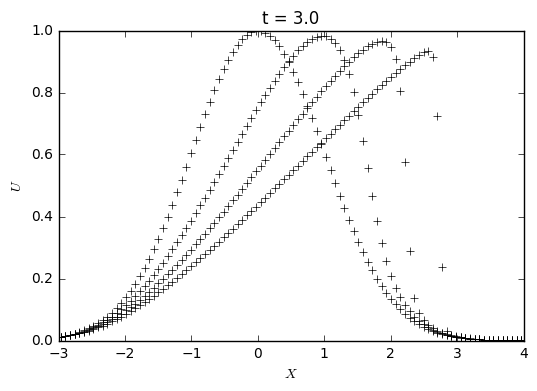

In [70]:

b = Burger(100,-3,4,0,0.5)
b.setInitialCondition(gauss, 0.0, 1.0)
ax = b.plot(filename="u.pdf")
b.evolve(1.0)
b.plot(ax)
b.evolve(2.0)
b.plot(ax)
b.evolve(3.0)
b.plot(ax)

b.saveTxt("burger.txt")


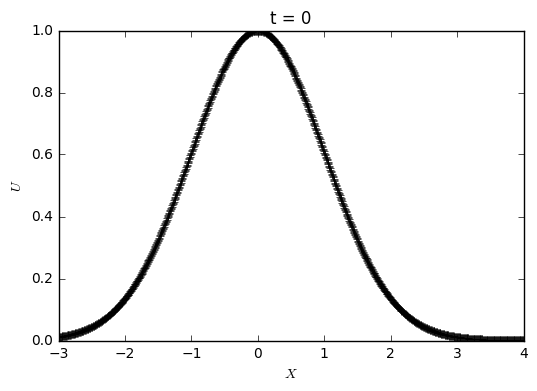

In [45]:
b2 = Burger(1000,-3,4,0,0.5)
b2.setInitialCondition(gauss, 0.0, 1.0)
ax2 = b2.plot(filename="u.pdf")
b2.evolve(3.0)
b2.plot(ax, filename="both.pdf")

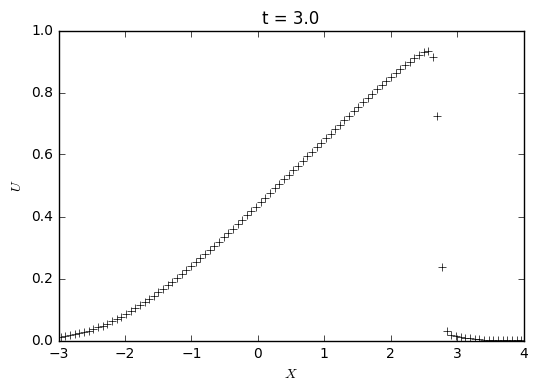

In [71]:
b_restore  = Burger(1,1,1,1,1)
b_restore.loadTxt("burger.txt")
b_restore.plot()

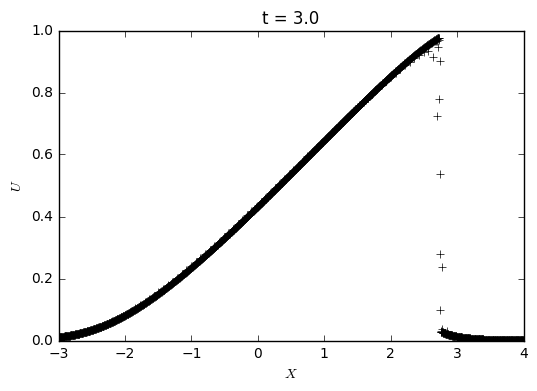

In [46]:
b = Burger(100,-3,4,0,0.5)
b.setInitialCondition(gauss, 0.0, 1.0)
b2 = Burger(400,-3,4,0,0.5)
b2.setInitialCondition(gauss, 0.0, 1.0)
b3 = Burger(1600,-3,4,0,0.5)
b3.setInitialCondition(gauss, 0.0, 1.0)

b.evolve(3.0)
b2.evolve(3.0)
b3.evolve(3.0)

ax = b.plot()
b2.plot(ax)
b3.plot(ax)

In [64]:
b.saveTxt("burger.txt")

TypeError: Mismatch between array dtype ('float64') and format specifier ('%.18e')